# K-Means Clustering
The K-Means algorithm is mainly an algorithm design to do feature extraction and cluster analysis but given the speed and simplicity, there is potential for it to be used to speed up other algorithms. As examples one can consider a "compression" scenario point reduction for linear/non-linear regression, colour reduction on images to be used to further speed up Convolutional Neural Networks, etc.

Firstly for this, we will be using `numpy` and `matplotlib.pyplot` as our only dependencies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now that the deendencies are taken care of, we will define a `Dot` object. This will serve a dual purpose as it will have both `point` and `centroid` functionality. The methods are as follows:

- `d(Dot1,Dot2)` : finds the semi-Euclidian ($(\Delta x)^2 + (\Delta y)^2$ instead of $\sqrt{(\Delta x)^2 + (\Delta y)^2}$ making it much easier to compute since `sqrt()` implementations usually involve iterative methods such as Newton-Raphson) distance between any two dots

- `closestCentroid(self,centroids)` : loops over all centroids and finds the closest one to that point

- `recenter(self,points)` : redefines the position of the centroid depending on the points associated with it

- `perturbCentroid(e)` : perturbs the position of the centroid with strength `e` in order to temporarily nudge it away from solutions to potentially look for new ones 

In [2]:
class Dot:
    def __init__(self, _x, _y):
        self.x = _x
        self.y = _y
        self.centIndex = None
    
    def d(self, other):
        return (self.x-other.x)*(self.x-other.x) + (self.y-other.y)*(self.y-other.y)
    
    def closestCentroid (self, centroids):
        s = np.Inf
        for i in range(len(centroids)):
            if s>self.d(centroids[i]):
                s=self.d(centroids[i])
                self.centIndex=i
    
    def recenter(self, points):
        x=0
        y=0
        num=0
        for i in range(len(points)):
            if points[i].centIndex==self.centIndex:
                x += points[i].x
                y += points[i].y
                num+=1
    
        self.x = x/num
        self.y = y/num
    
    def perturbCentroid(e):
        self.x += np.random.normal(0,e)
        self.y += np.random.normal(0,e)

Next we create the points and two centroids (in this case we know the background of the data)

In [7]:
pts = np.empty(10000,dtype=object)
cent = np.empty(2,dtype=object)

for _ in range(10000):
    r = np.random.randint(0,2)
    if r==0:
        pts[_]=Dot(np.random.normal(1,1),np.random.normal(1,1))
    else:
        pts[_]=Dot(np.random.normal(5,2),np.random.normal(7,3))

for _ in range(2):
    cent[_]=Dot(np.random.randint(0,6),np.random.randint(0,6))
    cent[_].centIndex=_

Here we optimise the centroid position. For 10,000 datapoints we do not need more than 15 iterations in order to have a decent result for the given data.

In [4]:
for _ in range(15):
    for j in range(10000):
        pts[j].closestCentroid(cent)
    for j in range(2):
        cent[j].recenter(pts)

ptsX = np.empty(10000)
ptsY = np.empty(10000)
centX = np.empty(2)
centY = np.empty(2)

for _ in range(10000):
    ptsX[_]=pts[_].x
    ptsY[_]=pts[_].y

for _ in range(2):
    centX[_]=cent[_].x
    centY[_]=cent[_].y
    


All that's left to do now is plot everything (data will be in blue and centroids in orange).

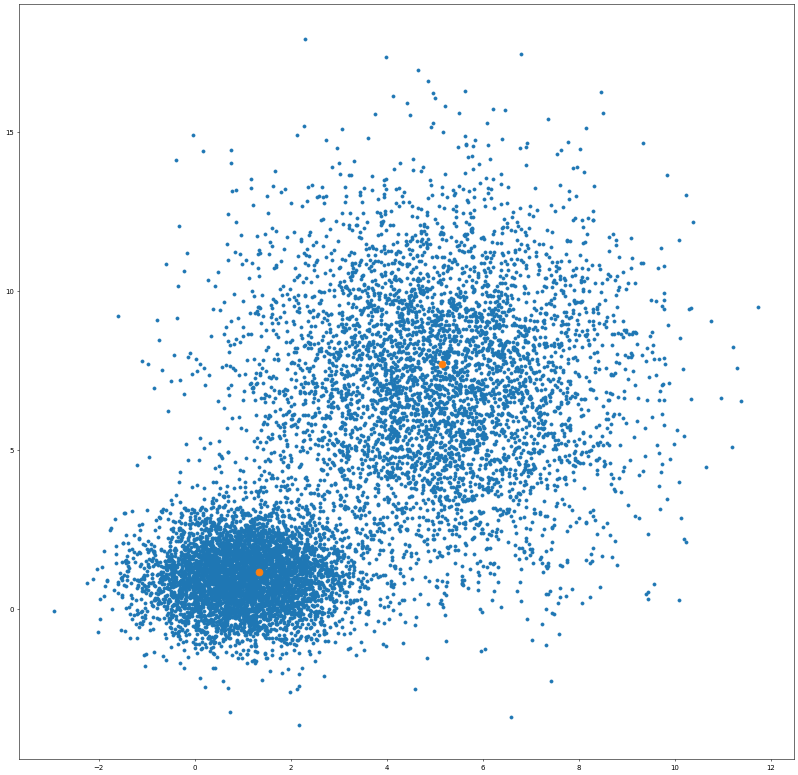

In [19]:
fig = plt.figure(figsize=(20, 20), dpi= 50)
plt.scatter(ptsX,ptsY,20)
plt.scatter(centX,centY,100)
plt.show()